In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os



In [2]:
df = pd.read_csv('../csv/Injuries.csv')
df.head()

,Date,Team,Acquired,Relinquished,Notes
0,2010-10-03,Bulls,NaN,Carlos Boozer,fractured bone in right pinky finger (out inde...
1,2010-10-06,Pistons,NaN,Jonas Jerebko,torn right Achilles tendon (out indefinitely)
2,2010-10-06,Pistons,NaN,Terrico White,broken fifth metatarsal in right foot (out ind...
3,2010-10-08,Blazers,NaN,Jeff Ayres,torn ACL in right knee (out indefinitely)
4,2010-10-08,Nets,NaN,Troy Murphy,strained lower back (out indefinitely)


In [3]:
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
#Posterior a 2013
df = df[df['Date'].dt.year >= 2013]

In [5]:
df[df['Notes'] == 'placed on IL']

,Date,Team,Acquired,Relinquished,Notes
5901,2013-01-04,Bucks,NaN,Doron Lamb,placed on IL
5903,2013-01-04,Cavaliers,NaN,Jon Leuer,placed on IL
5914,2013-01-04,Pacers,NaN,Miles Plumlee,placed on IL
5916,2013-01-04,Pistons,NaN,Khris Middleton,placed on IL
5945,2013-01-07,Blazers,NaN,Will Barton,placed on IL
...,...,...,...,...,...
26644,2020-03-06,Heat,NaN,Gabe Vincent,placed on IL
26668,2020-03-07,Nuggets,NaN,Vlatko Cancar,placed on IL
26825,2020-08-01,Heat,NaN,Gabe Vincent,placed on IL
26884,2020-08-07,Pelicans,NaN,Zion Williamson,placed on IL


In [6]:
df = df[df['Notes'] != 'placed on IL']
df = df[df['Notes'] != 'activated from IL']
df = df[df['Notes'] != 'returned to lineup']

# Quita todos los que hayan vuelto de una lesion

In [7]:
df['Out Indefinitely'] = df['Notes'].str.contains('out indefinitely') | df['Notes'].str.contains('out for season')
# Crea una columna para aquellos que esten fuera indefinidamente o por toda la temporada

In [8]:
df[df['Notes'] =='placed on IL with sprained left ankle']
# Esguinces de tobillo izquierdo

,Date,Team,Acquired,Relinquished,Notes,Out Indefinitely
5912,2013-01-04,Nets,NaN,Kris Humphries,placed on IL with sprained left ankle,False
5947,2013-01-07,Kings,NaN,Marcus Thornton,placed on IL with sprained left ankle,False
6605,2013-03-03,Spurs,NaN,Tony Parker,placed on IL with sprained left ankle,False
6633,2013-03-06,Jazz,NaN,Al Jefferson,placed on IL with sprained left ankle,False
6651,2013-03-06,Wizards,NaN,Bradley Beal,placed on IL with sprained left ankle,False
...,...,...,...,...,...,...
26691,2020-03-08,Timberwolves,NaN,Kelan Martin,placed on IL with sprained left ankle,False
26809,2020-07-31,Rockets,NaN,Eric Gordon,placed on IL with sprained left ankle,False
26848,2020-08-04,Jazz,NaN,Nigel Williams-Goss,placed on IL with sprained left ankle,False
26869,2020-08-06,Heat,NaN,Goran Dragic,placed on IL with sprained left ankle,False


In [9]:
'''
En este fragmento de código, se define una lista llamada `injuries` que contiene una serie de lesiones 
relacionadas con el baloncesto. Luego, se define una función llamada `injury_detection` que recibe un parámetro `x`. 
Esta función busca coincidencias entre las lesiones de la lista y el parámetro `x`, y devuelve el resultado 
de la detección de lesiones.
La función recorre cada elemento de la lista `injuries` y verifica si ese elemento está presente en `x`. 
Si encuentra una coincidencia, agrega la lesión a una lista llamada `matching_injury`. 
Luego, se verifica la longitud de la lista `matching_injury`. Si solo hay una lesión coincidente, 
se devuelve esa lesión. Si hay más de una lesión coincidente, se devuelve una cadena que las une con la palabra "y". 
Si no hay lesiones coincidentes, se devuelve la cadena "other".
'''
injuries = ['knee', 'shoulder', 'hip', 'ankle', 'elbow', 'foot', 'heel', 'hand', 'hamstring', 'back', 'groin', 'neck', 'head', 'wrist', 'calf', 'leg', 'concussion', 'Achilles',
            'thigh', 'tibia', 'toe', 'adductor', 'chest', 'nose', 'forearm', 'gluteus', 'eye', 'patella', 'quadricap','rib','shin','pelvis','kneecap','orbital','thumb',
            'spinal cord', 'tailbone','cervical','cornea','cheekbone','collarbone','jaw','flexor','forehead','fibula','oral','facial','abdominal','abdomen','heart','throat', 'quadricep', 'oblique', 'finger', 'hernia'
            , 'abductor', 'tricep', 'bicep', 'lat', 'lung', 'face','biceps','triceps','pectoral','plantar','disc', 'adductor', 'bronchitis','chest','nose','forearm','gluteus','eye','heel','patella',
            'quadricap','rib,shin', 'thigh','tibia','toe','pelvis','kneecap','leg','orbital bone','thumb','spinal cord','tailbone','cervical','corne']

def injury_detection(x):
  matching_injury = []
  for injury in injuries:
    if injury in x:
      matching_injury.append(injury)
  if len(matching_injury) == 1:
    return matching_injury[0]
  elif len(matching_injury) > 1:
    return ' and '.join(matching_injury)
  elif len(matching_injury) == 0:
    return 'other'


In [10]:
#Se crea la columna para asignar el tipo de lesion utilizando la funcion injury_detection
df['injury_type'] = df['Notes'].apply(injury_detection)

In [11]:
# Cantidad de lesiones por tipo
df['injury_type'].value_counts()

injury_type
knee                            1871
other                           1737
ankle                           1651
back                             646
hamstring                        506
                                ... 
concussion and nose and nose       1
hip and wrist                      1
head and forehead                  1
knee and shoulder                  1
shoulder and neck                  1
Name: count, Length: 162, dtype: int64

In [12]:
# Funcion para categorizar las lesiones
def categorize_injury(injury):
    if injury in ['hand', 'wrist', 'thumb', 'finger']:
        return 'Hand'
    elif injury in ['facial', 'jaw', 'cheekbone', 'orbital', 'nose', 'eye', 'oral', 'cornea', 'forehead','throat','face']:
        return 'Facial'
    elif injury in ['back', 'spinal cord', 'tailbone']:
        return 'Back'
    elif injury in ['leg', 'thigh', 'tibia', 'shin', 'quadricep', 'hamstring', 'knee','patella', 'kneecap', 'calf','Achilles','adductor','fibula', 'ankle']:
        return 'Leg'
    elif injury in ['plantar','foot', 'heel', 'toe']:
        return 'Foot'
    elif injury in ['forearm','elbow', 'arm','tricep','bicep','biceps','triceps','flexor']:
        return 'Arm'
    elif injury in ['shoulder', 'chest', 'collarbone', 'rib','abdominal', 'abdomen', 'heart', 'lung', 'pectoral','disc']:
        return 'Upper Body'
    elif injury in ['hip', 'groin', 'pelvis', 'gluteus','quadricap']:
        return 'Lower Body'
    elif injury in ['head','concussion', 'neck','cervical']:
        return 'Head'
    else:
        return 'Others'

# Aplicar la categorizacion para crear la columna body_part
df['body_part'] = df['injury_type'].apply(categorize_injury)


In [13]:
# Categoriza la temporada en la que se encuentra, es decir si esta entre dos fechas años, por ejemplo 2015-04-01 se catgoriza como 14-15
def categorize_season(date):
    if pd.Timestamp('2012-10-30') <= date <= pd.Timestamp('2013-10-28'):
        return '12-13'
    elif pd.Timestamp('2013-10-29') <= date <= pd.Timestamp('2014-10-27'):
        return '13-14'
    elif pd.Timestamp('2014-10-28') <= date <= pd.Timestamp('2015-10-26'):
        return '14-15'
    elif pd.Timestamp('2015-10-27') <= date <= pd.Timestamp('2016-10-24'):
        return '15-16'
    elif pd.Timestamp('2016-10-24') <= date <= pd.Timestamp('2017-10-16'):
        return '16-17'
    elif pd.Timestamp('2017-10-17') <= date <= pd.Timestamp('2018-10-15'):
        return '17-18'
    elif pd.Timestamp('2018-10-16') <= date <= pd.Timestamp('2019-10-21'):
        return '18-19'
    elif pd.Timestamp('2019-10-22') <= date <= pd.Timestamp('2020-12-21'):
        return '19-20'
    elif pd.Timestamp('2020-12-22') <= date <= pd.Timestamp('2021-10-18'):
        return '20-21'

In [14]:
df['SEASON'] = df['Date'].apply(categorize_season)

In [15]:
# Filtrar solo por 2013 en adelante

df = df[df['SEASON'].notna()]
df = df[~df['SEASON'].isin(['10-11', '11-12', '12-13'])]

In [16]:
df_injuries_only = df.copy()

In [17]:
df_injuries_only

,Date,Team,Acquired,Relinquished,Notes,Out Indefinitely,injury_type,body_part,SEASON
7514,2013-10-29,76ers,NaN,Jason Richardson,placed on IL recovering from surgery on left k...,True,knee,Leg,13-14
7515,2013-10-29,76ers,NaN,Nerlens Noel,placed on IL recovering from surgery on left k...,True,knee,Leg,13-14
7516,2013-10-29,Bucks,NaN,Carlos Delfino,recovering from surgery on right foot (out ind...,True,foot,Foot,13-14
7517,2013-10-29,Cavaliers,NaN,Carrick Felix,sports hernia (out indefinitely),True,hernia,Others,13-14
7518,2013-10-29,Celtics,NaN,Rajon Rondo,recovering from surgery on left knee to repair...,True,knee,Leg,13-14
...,...,...,...,...,...,...,...,...,...
27097,2020-09-22,Celtics,NaN,Romeo Langford,surgery on right wrist (out for season),True,wrist,Hand,19-20
27098,2020-09-23,Heat,NaN,Gabe Vincent,sore right knee (DTD),False,knee,Leg,19-20
27099,2020-09-30,Heat,NaN,Bam Adebayo,strained left shoulder (DTD),False,shoulder,Upper Body,19-20
27101,2020-10-02,Heat,NaN,Bam Adebayo,strained neck (DTD),False,neck,Head,19-20


In [18]:
## Cargar el archivo de estadisticas de los jugadores
df_gamestats = pd.read_csv('../csv/merged.csv')

In [19]:
df_gamestats = df_gamestats[~df_gamestats['SEASON'].isin(['20-21', '21-22', '22-23', '23-24'])]

In [20]:
# Hay ~500 jugadores por temporada, entonces en total 3727 de 2013-2020
df_gamestats

,PLAYER_ID,PLAYER_NAME,SEASON,SEASON_NUM,AGE,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,GP,MIN,USG_PCT,...,AVG_SEC_PER_TOUCH,AVG_DRIB_PER_TOUCH,ELBOW_TOUCHES,POST_TOUCHES,PAINT_TOUCHES,TEAM,INJURED ON,RETURNED,DAYS MISSED,INJURED_TYPE
1851,203932,Aaron Gordon,19-20,19.5,24.0,80,235,62,32.5,0.205,...,2.88,1.91,1.8,3.2,4.3,NaN,NaN,NaN,NaN,NaN
1852,1628988,Aaron Holiday,19-20,19.5,23.0,72,185,66,24.5,0.182,...,4.35,4.17,0.1,0.0,0.3,NaN,NaN,NaN,NaN,NaN
1853,1627846,Abdel Nader,19-20,19.5,26.0,77,225,55,15.8,0.164,...,2.05,1.41,0.2,0.0,0.4,Thunder,2020-01-15,2020-01-29,14.0,Sprained_ankle
1854,1629690,Adam Mokoka,19-20,19.5,21.0,77,190,11,10.2,0.110,...,1.47,0.83,0.2,0.0,0.8,NaN,NaN,NaN,NaN,NaN
1855,1629678,Admiral Schofield,19-20,19.5,23.0,77,241,33,11.2,0.118,...,1.40,0.51,0.2,0.2,0.6,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5573,2584,Willie Green,13-14,13.5,32.0,75,201,55,15.8,0.162,...,2.44,1.84,0.5,0.1,0.5,NaN,NaN,NaN,NaN,NaN
5574,201163,Wilson Chandler,13-14,13.5,27.0,80,225,62,31.1,0.193,...,2.33,1.26,1.4,1.0,1.7,NaN,NaN,NaN,NaN,NaN
5575,202333,Xavier Henry,13-14,13.5,23.0,78,220,43,21.1,0.223,...,3.24,2.45,0.9,0.1,1.2,NaN,NaN,NaN,NaN,NaN
5576,2216,Zach Randolph,13-14,13.5,32.0,81,260,79,34.2,0.258,...,2.15,0.81,3.6,17.3,9.5,NaN,NaN,NaN,NaN,NaN


In [21]:
# Unir los dos dataframes por nombre, temporada y equipo
merged_df = pd.merge(df_gamestats, df_injuries_only, how = 'left', left_on=['PLAYER_NAME', 'SEASON', 'TEAM'], right_on=['Relinquished', 'SEASON', 'Team'])

In [22]:
# Eliminar duplicados
merged_df_cleaned = merged_df.drop_duplicates(subset = ['SEASON_NUM', 'injury_type', 'Out Indefinitely', 'PLAYER_NAME', 'Team'])
merged_df_cleaned

,PLAYER_ID,PLAYER_NAME,SEASON,SEASON_NUM,AGE,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,GP,MIN,USG_PCT,...,DAYS MISSED,INJURED_TYPE,Date,Team,Acquired,Relinquished,Notes,Out Indefinitely,injury_type,body_part
0,203932,Aaron Gordon,19-20,19.5,24.0,80,235,62,32.5,0.205,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1628988,Aaron Holiday,19-20,19.5,23.0,72,185,66,24.5,0.182,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1627846,Abdel Nader,19-20,19.5,26.0,77,225,55,15.8,0.164,...,14.0,Sprained_ankle,2020-01-14,Thunder,NaN,Abdel Nader,sprained left ankle (DTD),False,ankle,Leg
4,1627846,Abdel Nader,19-20,19.5,26.0,77,225,55,15.8,0.164,...,14.0,Sprained_ankle,2020-08-14,Thunder,NaN,Abdel Nader,placed on IL with neck injury,False,neck,Head
5,1629690,Adam Mokoka,19-20,19.5,21.0,77,190,11,10.2,0.110,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6142,2584,Willie Green,13-14,13.5,32.0,75,201,55,15.8,0.162,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6143,201163,Wilson Chandler,13-14,13.5,27.0,80,225,62,31.1,0.193,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6144,202333,Xavier Henry,13-14,13.5,23.0,78,220,43,21.1,0.223,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6145,2216,Zach Randolph,13-14,13.5,32.0,81,260,79,34.2,0.258,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
clean_list = ['PLAYER_ID', 'Acquired', 'Relinquished']
merged_df_cleaned = merged_df_cleaned.drop(columns = clean_list, index = 1)

In [24]:
merged_df_cleaned.columns

Index(['PLAYER_NAME', 'SEASON', 'SEASON_NUM', 'AGE', 'PLAYER_HEIGHT_INCHES',
       'PLAYER_WEIGHT', 'GP', 'MIN', 'USG_PCT', 'PACE', 'POSS', 'FGA_PG',
       'DRIVES', 'DRIVE_FGA', 'DRIVE_PASSES', 'DIST_MILES', 'AVG_SPEED',
       'PULL_UP_FGA', 'PULL_UP_FG3A', 'TOUCHES', 'FRONT_CT_TOUCHES',
       'AVG_SEC_PER_TOUCH', 'AVG_DRIB_PER_TOUCH', 'ELBOW_TOUCHES',
       'POST_TOUCHES', 'PAINT_TOUCHES', 'TEAM', 'INJURED ON', 'RETURNED',
       'DAYS MISSED', 'INJURED_TYPE', 'Date', 'Team', 'Notes',
       'Out Indefinitely', 'injury_type', 'body_part'],
      dtype='object')

In [25]:
merged_df_cleaned.shape

(4274, 37)

## Dataset final con 4327 filas y 37 columnas

In [26]:
# Binario de si esta fuera indefinidamente
merged_df_cleaned['Out Indefinitely'].fillna(False, inplace=True)
merged_df_cleaned['Out Indefinitely'] = [1 if x == True else 0 for x in merged_df_cleaned['Out Indefinitely']]

/var/folders/2d/56mz7t5d7kb31lgh5mvnqf0m0000gn/T/ipykernel_47231/3671150297.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df_cleaned['Out Indefinitely'].fillna(False, inplace=True)
/var/folders/2d/56mz7t5d7kb31lgh5mvnqf0m0000gn/T/ipykernel_47231/3671150297.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting',

In [27]:
merged_df_cleaned['Injured'] = np.where(merged_df_cleaned['injury_type'].notna(), 1, 0)

In [28]:
merged_df_cleaned

,PLAYER_NAME,SEASON,SEASON_NUM,AGE,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,GP,MIN,USG_PCT,PACE,...,RETURNED,DAYS MISSED,INJURED_TYPE,Date,Team,Notes,Out Indefinitely,injury_type,body_part,Injured
0,Aaron Gordon,19-20,19.5,24.0,80,235,62,32.5,0.205,99.72,...,NaN,NaN,NaN,NaT,NaN,NaN,0,NaN,NaN,0
2,Abdel Nader,19-20,19.5,26.0,77,225,55,15.8,0.164,101.79,...,2020-01-29,14.0,Sprained_ankle,2020-01-14,Thunder,sprained left ankle (DTD),0,ankle,Leg,1
4,Abdel Nader,19-20,19.5,26.0,77,225,55,15.8,0.164,101.79,...,2020-01-29,14.0,Sprained_ankle,2020-08-14,Thunder,placed on IL with neck injury,0,neck,Head,1
5,Adam Mokoka,19-20,19.5,21.0,77,190,11,10.2,0.110,100.37,...,NaN,NaN,NaN,NaT,NaN,NaN,0,NaN,NaN,0
6,Admiral Schofield,19-20,19.5,23.0,77,241,33,11.2,0.118,103.13,...,NaN,NaN,NaN,NaT,NaN,NaN,0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6142,Willie Green,13-14,13.5,32.0,75,201,55,15.8,0.162,98.46,...,NaN,NaN,NaN,NaT,NaN,NaN,0,NaN,NaN,0
6143,Wilson Chandler,13-14,13.5,27.0,80,225,62,31.1,0.193,99.49,...,NaN,NaN,NaN,NaT,NaN,NaN,0,NaN,NaN,0
6144,Xavier Henry,13-14,13.5,23.0,78,220,43,21.1,0.223,101.48,...,NaN,NaN,NaN,NaT,NaN,NaN,0,NaN,NaN,0
6145,Zach Randolph,13-14,13.5,32.0,81,260,79,34.2,0.258,90.59,...,NaN,NaN,NaN,NaT,NaN,NaN,0,NaN,NaN,0


In [29]:
merged_df_cleaned.dtypes[merged_df_cleaned.dtypes == object]

PLAYER_NAME             object
SEASON                  object
PLAYER_HEIGHT_INCHES    object
PLAYER_WEIGHT           object
DIST_MILES              object
AVG_SPEED               object
PULL_UP_FG3A            object
TEAM                    object
INJURED ON              object
RETURNED                object
INJURED_TYPE            object
Team                    object
Notes                   object
injury_type             object
body_part               object
dtype: object

**Procesamiento de datos**

In [30]:
#Mes y año de la columna 'Date'
merged_df_cleaned['year'] = pd.DatetimeIndex(merged_df_cleaned['Date']).year
merged_df_cleaned['month'] = pd.DatetimeIndex(merged_df_cleaned['Date']).month

In [31]:
# Cambiar columnas a numericas
numeric_columns = ['PLAYER_HEIGHT_INCHES', 'GP', 'PLAYER_WEIGHT', 'POSS', 'DIST_MILES', 'AVG_SPEED', 'PULL_UP_FG3A']
for col in numeric_columns:
  merged_df_cleaned[col] = pd.to_numeric(merged_df_cleaned[col], errors='coerce')

# 2. EDA


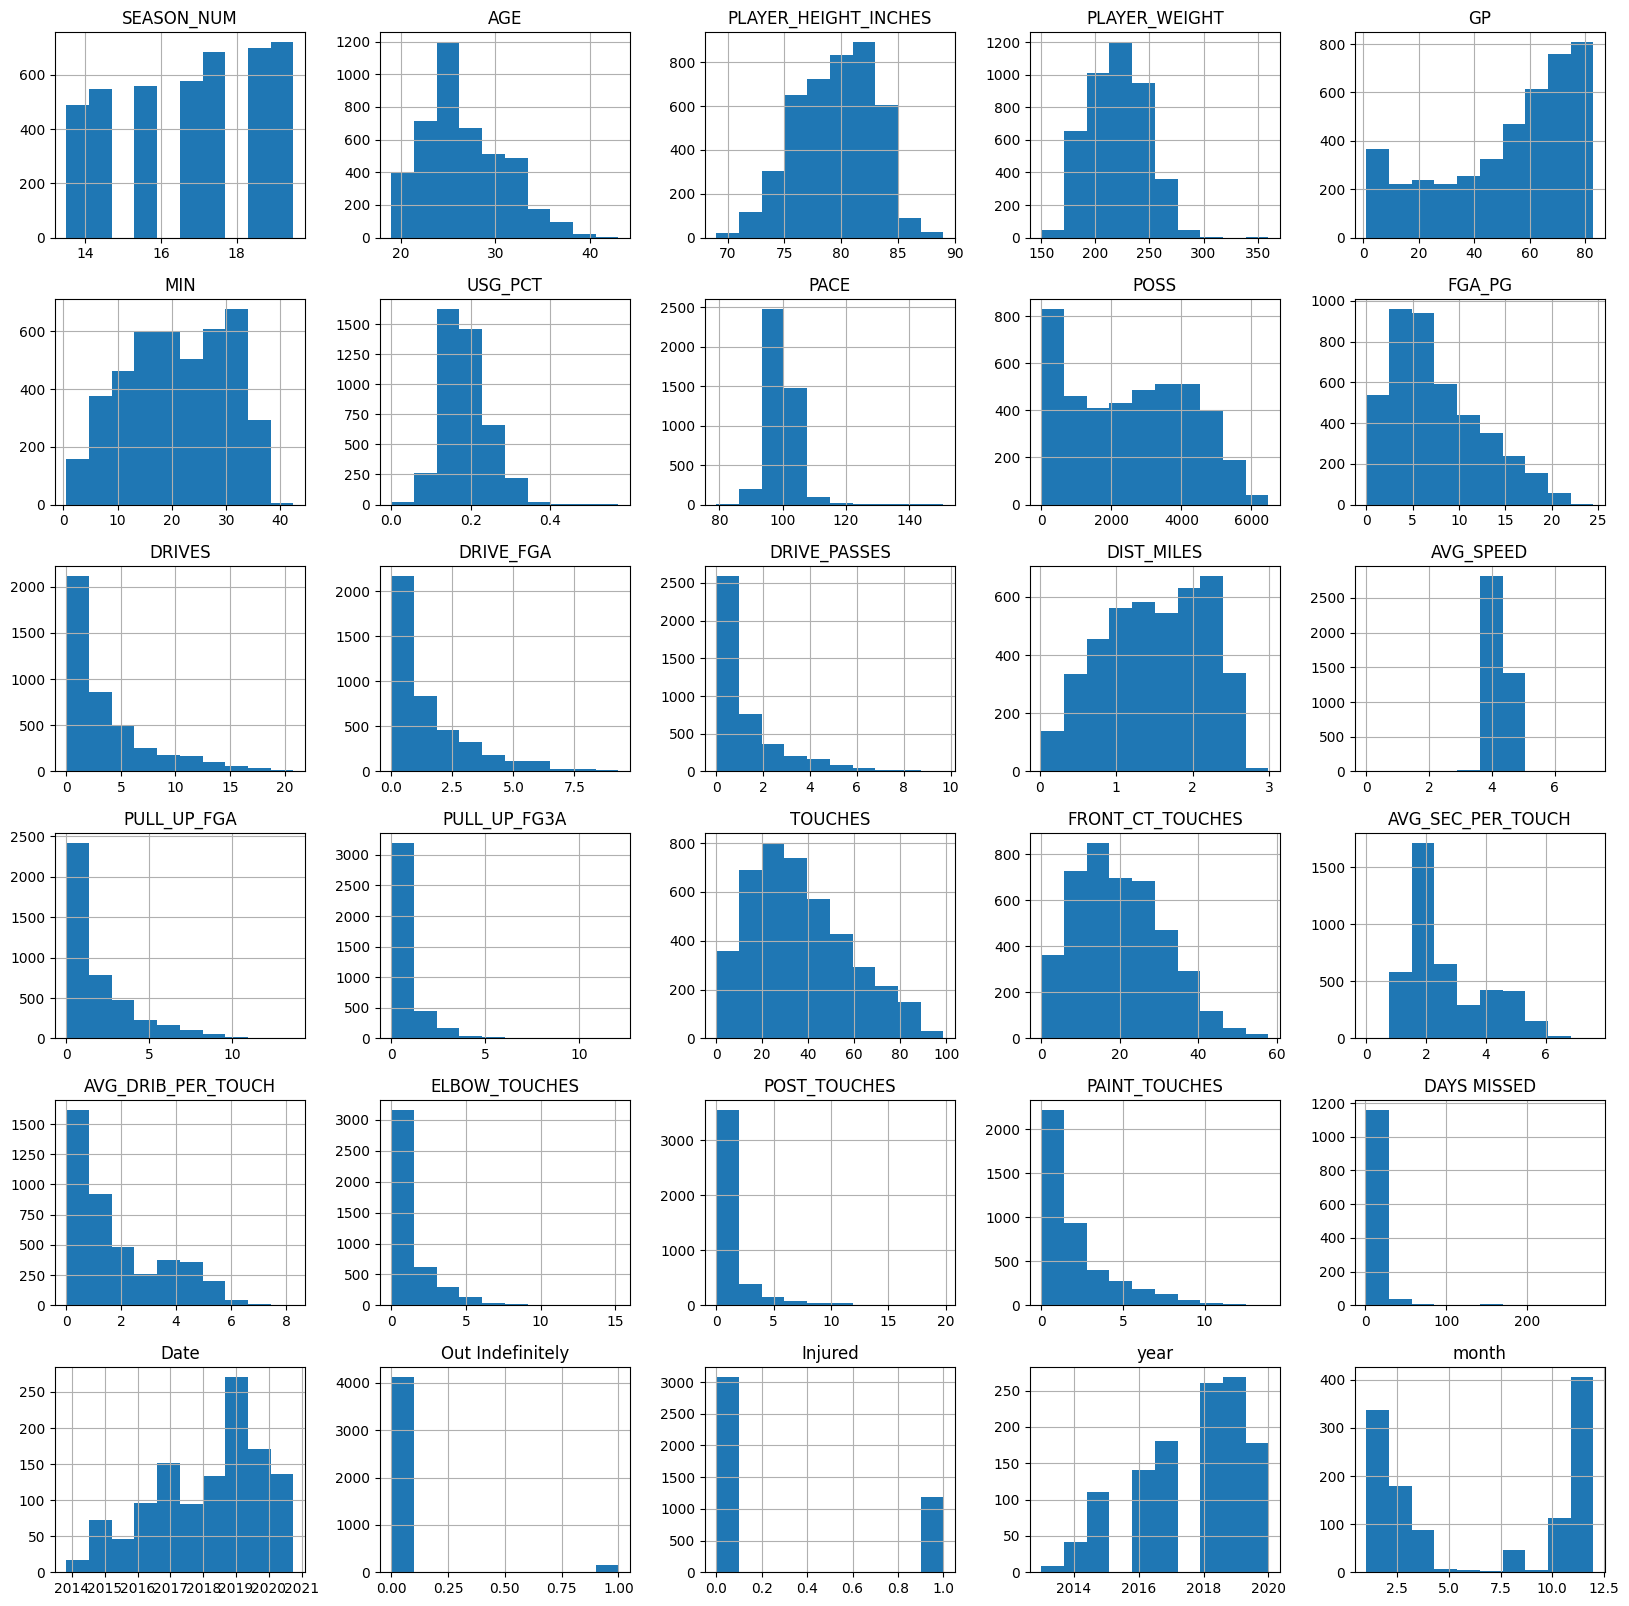

In [32]:
merged_df_cleaned.hist(figsize = (20,20))
plt.show()

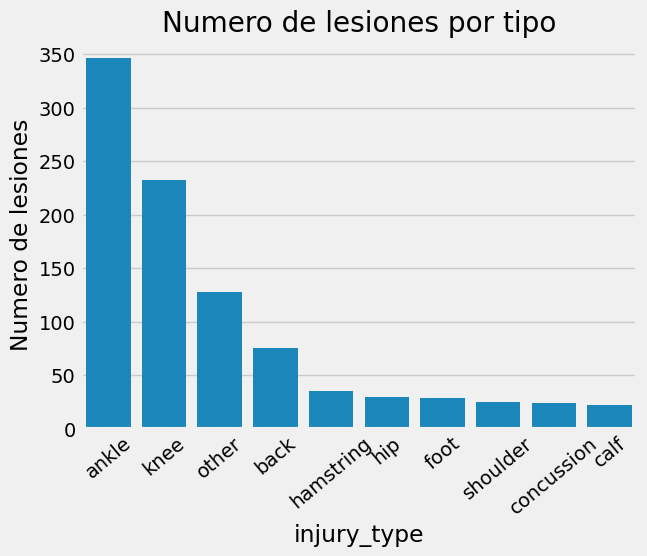

In [33]:
plt.style.use('fivethirtyeight')
sns.barplot(merged_df_cleaned['injury_type'].value_counts().head(10))
plt.xticks(rotation = 40)
plt.ylabel('Numero de lesiones')
plt.title('Numero de lesiones por tipo')
plt.show()


In [34]:
#Lesiones inferiores
merged_df_cleaned['lower body injury'] = np.where(merged_df_cleaned['body_part'] == 'Lower Body', 1, 0)
# Se crea un columna de binarios en donde si la lesion es de la parte inferior del cuerpo, se asigna 1, de lo contrario 0

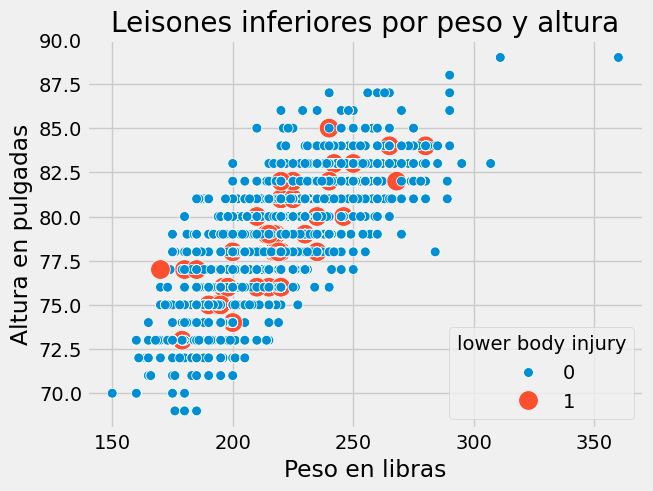

In [35]:
sns.scatterplot(x='PLAYER_WEIGHT', y='PLAYER_HEIGHT_INCHES', hue='lower body injury', data=merged_df_cleaned, size='lower body injury', sizes=(200, 50))
plt.ylabel('Altura en pulgadas')
plt.xlabel('Peso en libras')
plt.title('Leisones inferiores por peso y altura')
plt.show()

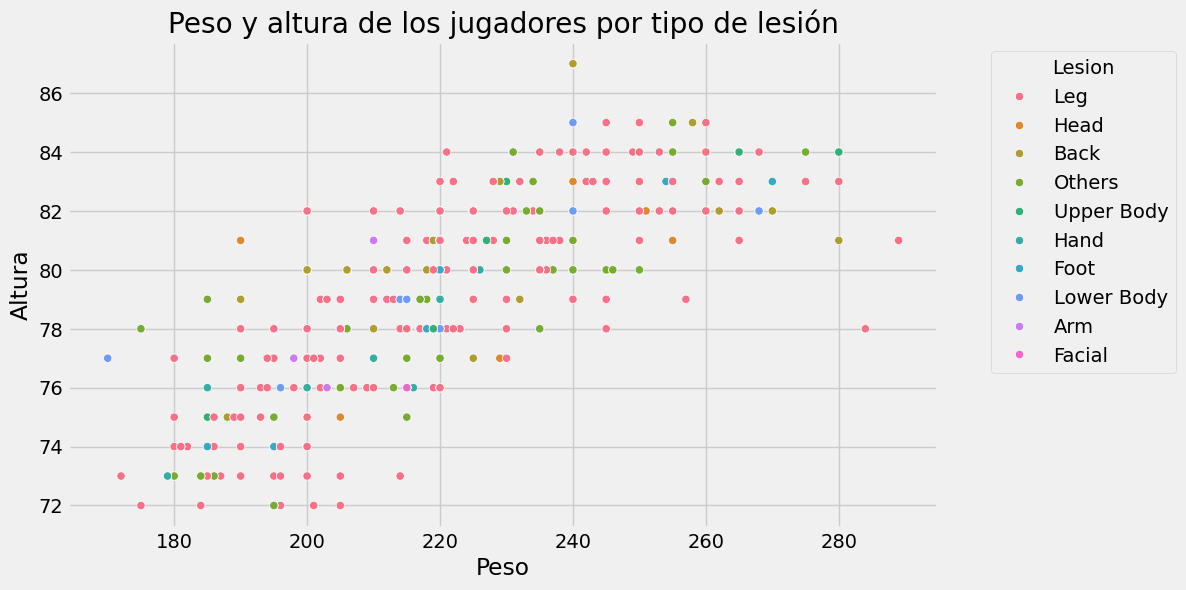

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PLAYER_WEIGHT', y='PLAYER_HEIGHT_INCHES', hue='body_part', data=merged_df_cleaned)
plt.title('Peso y altura de los jugadores por tipo de lesión')
plt.xlabel('Peso')
plt.ylabel('Altura')

plt.legend(title='Lesion', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

## No se observa una relacion clara entre el peso y la altura de los jugadores con las lesiones

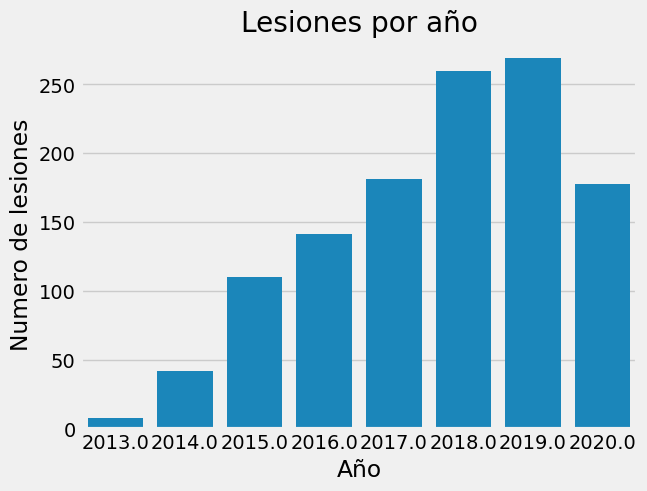

In [37]:
# Que año tuvo mas lesiones

year_counts = merged_df_cleaned['year'].value_counts()
sns.barplot(x=year_counts.index, y=year_counts.values)
plt.xlabel('Año')
plt.ylabel('Numero de lesiones')
plt.title('Lesiones por año')
plt.show()

# El 2019 es el año con mas lesiones, sin embargo, debemos investigar si es veridico o solo es una falta de datos

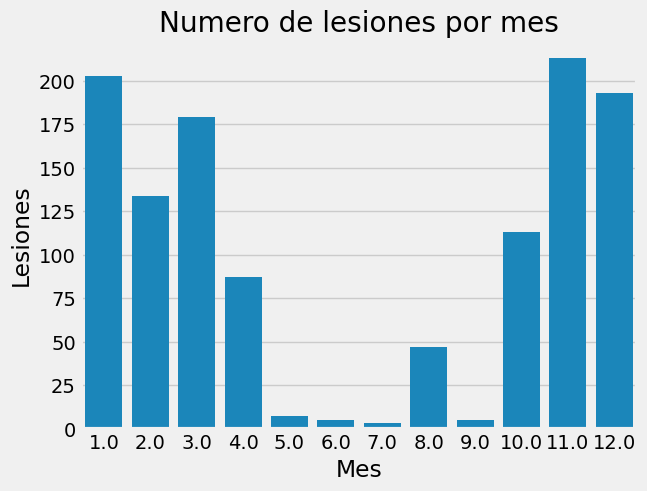

In [38]:
# Mes en que mas lesionados hubo

month_counts = merged_df_cleaned['month'].value_counts().sort_index()
sns.barplot(x=month_counts.index, y=month_counts.values)
plt.xlabel('Mes')
plt.ylabel('Lesiones')
plt.title('Numero de lesiones por mes')
plt.show()

In [39]:
# Porcentaje de lesiones que dejan fuera indefinidamente a los jugadores o por un largo periodo

total_injuries = len(merged_df_cleaned[merged_df_cleaned['injury_type'].notna()])
out_indefinitely_count = merged_df_cleaned['Out Indefinitely'].sum()
percentage_out_indefinitely = (out_indefinitely_count / total_injuries) * 100

print(f"El porcentaje de lesiones indefinidas es: {percentage_out_indefinitely:.2f}%")

El porcentaje de lesiones indefinidas es: 12.28%


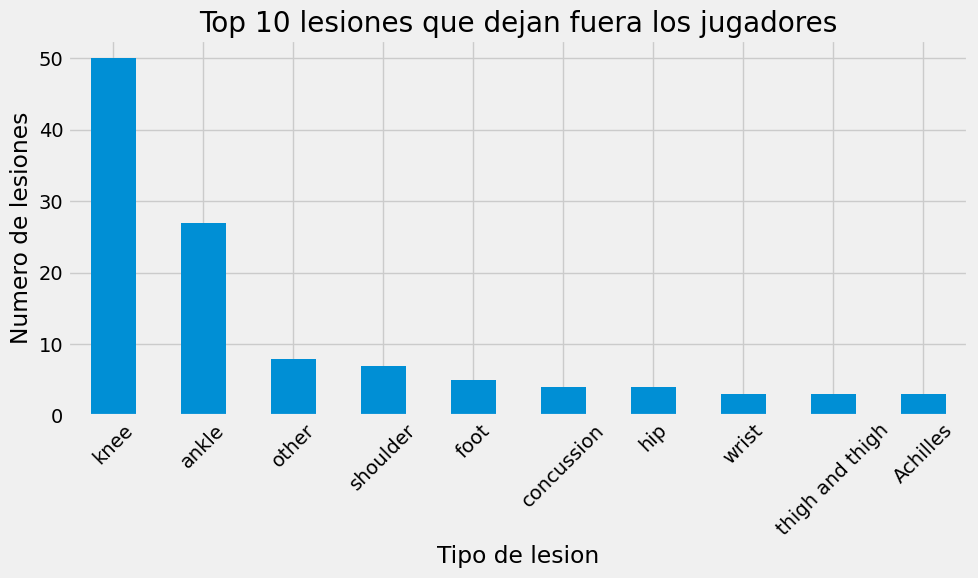

In [40]:
# Lesiones por las que mas jugadores quedan fuera indefinidamente
indefinite_injuries = merged_df_cleaned[merged_df_cleaned['Out Indefinitely'] == True]
injury_counts = indefinite_injuries['injury_type'].value_counts()
plt.figure(figsize=(10, 6))
injury_counts.head(10).plot(kind='bar')
plt.xlabel('Tipo de lesion')
plt.ylabel('Numero de lesiones')
plt.title('Top 10 lesiones que dejan fuera los jugadores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



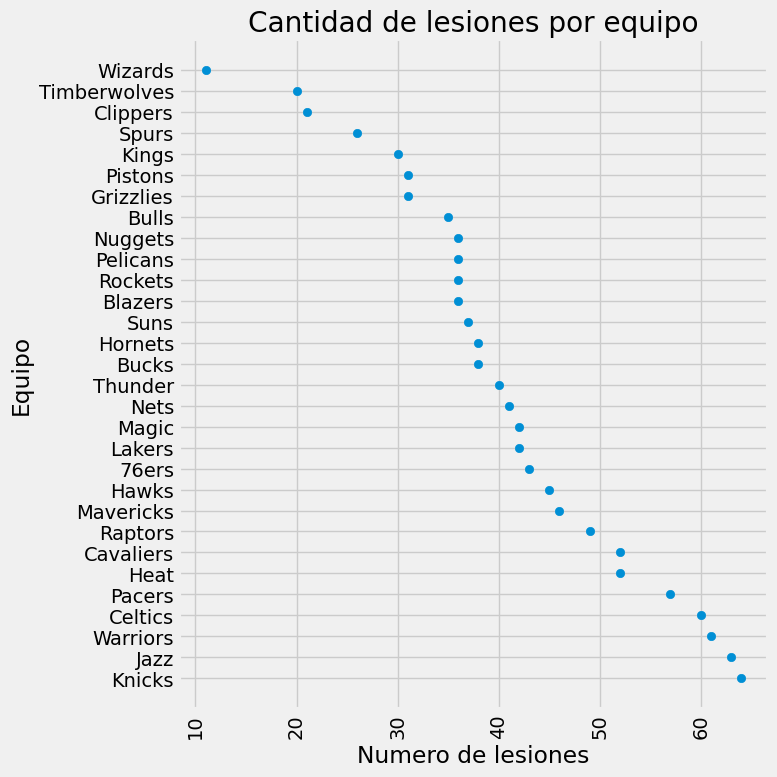

In [41]:
# Numero de lesiones por equipo
team_counts = merged_df_cleaned['TEAM'].value_counts()

# 30 equipos con mas lesiones
top_30_teams = team_counts.head(30)

# Equipo y numero de lesiones
teams = top_30_teams.values
counts = top_30_teams.index


plt.figure(figsize=(8, 8))
plt.scatter(teams, counts)
plt.xlabel('Numero de lesiones')
plt.ylabel('Equipo')
plt.title('Cantidad de lesiones por equipo')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()




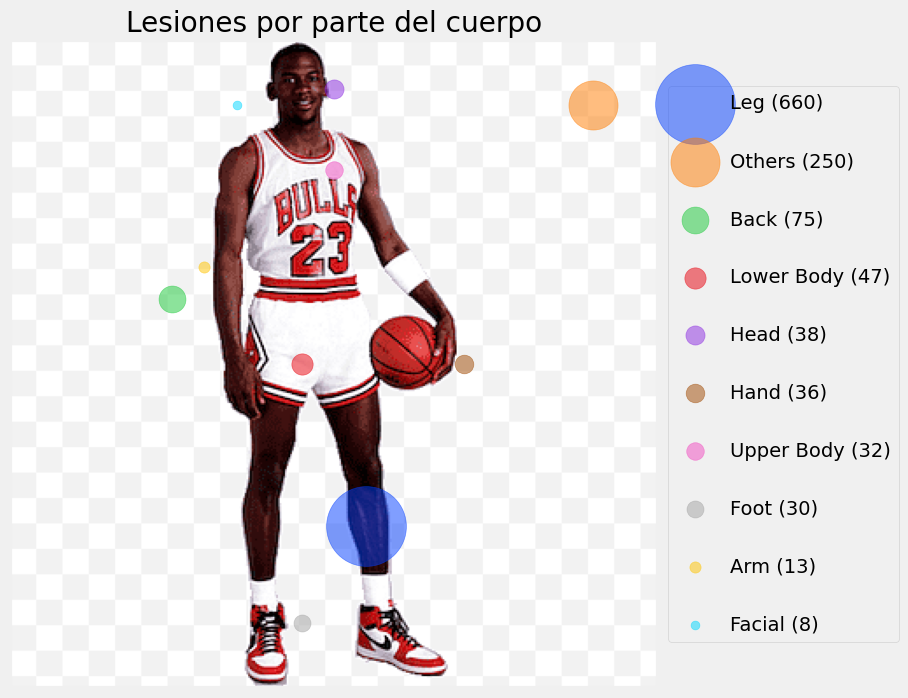

In [42]:
from PIL import Image

counts = merged_df_cleaned['body_part'].value_counts()

body_img = Image.open('../imagenes/jugador.png')
fig, ax = plt.subplots(figsize=(16, 8))
ax.imshow(body_img, extent=[0, 20, 0, 20])
bright_palette = sns.color_palette("bright")

for i, (injury, count) in enumerate(counts.items()):
    body_locations = {
        'Lower Body': (9, 10),
        'Leg': (11, 5),
        'Others': (18, 18),
        'Back': (5, 12),
        'Foot': (9, 2),
        'Hand': (14, 10),
        'Head': (10, 18.5),
        'Upper Body': (10, 16),
        'Facial': (7, 18),
        'Arm': (6, 13)
    }
    ax.scatter(*body_locations[injury], s=count*5, label=f'{injury} ({count})', alpha=0.5, color=bright_palette[i])


ax.set_title('Lesiones por parte del cuerpo')
plt.xticks([])
plt.yticks([])

plt.xlabel('')
plt.ylabel('')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), labelspacing=2)
ax.set_aspect('equal')
plt.grid(False)
plt.show()


In [43]:
merged_df.groupby('PLAYER_ID').agg({'GP': 'sum', 'body_part': 'count'}).sort_values(by = 'GP', ascending = False)


,GP,body_part
PLAYER_ID,,
201565,6367,122
2546,5845,94
203507,4485,56
201143,3851,52
203918,3812,61
...,...,...
1626296,1,0
1628769,1,0
1628935,1,0


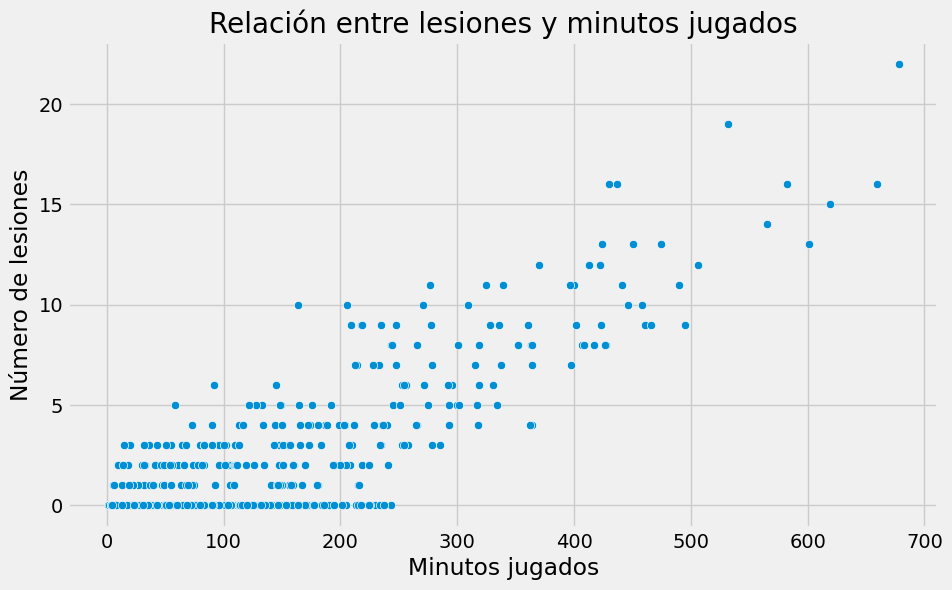

In [44]:
total_injury = merged_df_cleaned.groupby('PLAYER_NAME')['body_part'].count().reset_index()
player_gp_counts = merged_df_cleaned.groupby(['PLAYER_NAME', 'SEASON'])['MIN'].sum().reset_index()
player_gp_counts = player_gp_counts.groupby('PLAYER_NAME')['MIN'].sum().reset_index()
player_stats = pd.merge(total_injury, player_gp_counts, on='PLAYER_NAME')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MIN', y='body_part', data=player_stats)
plt.title('Relación entre lesiones y minutos jugados')
plt.xlabel('Minutos jugados')
plt.ylabel('Número de lesiones')
plt.show()

# Se observa que los jugadores que juegan mas minutos, tienden a tener mas lesiones

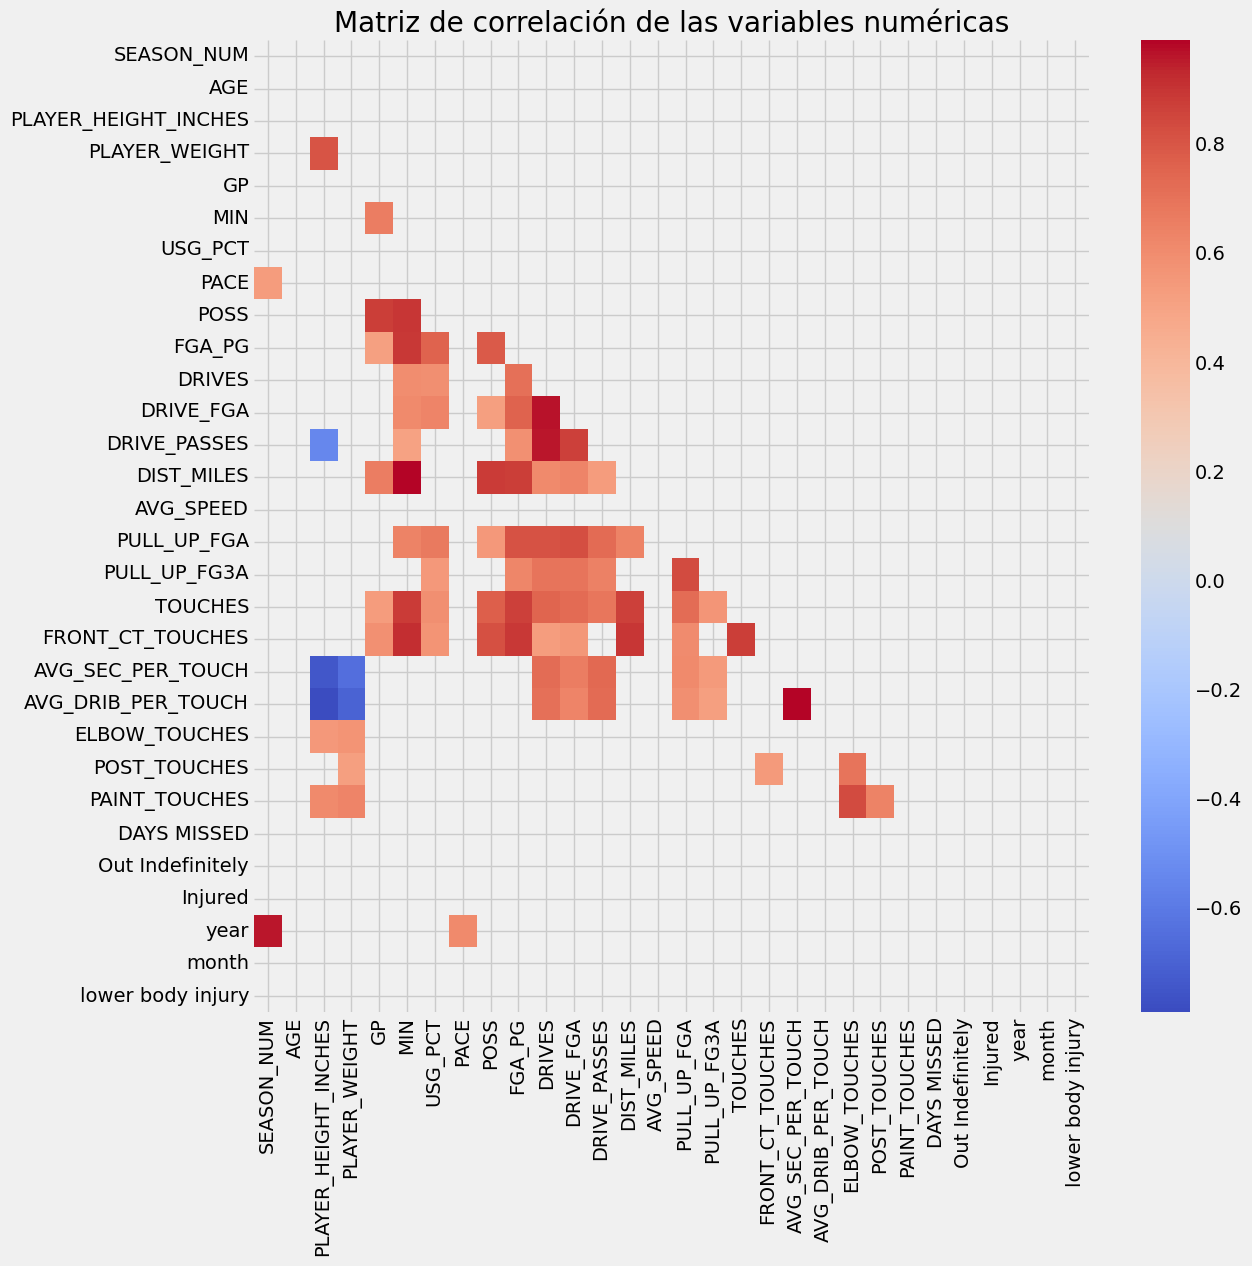

In [45]:
# Matriz de correlacion de las variables numericas
columnas_numericas = merged_df_cleaned.select_dtypes(include=[np.number]).columns
correlacion = merged_df_cleaned[columnas_numericas].corr()
plt.figure(figsize=(12, 12))
#Mostar solo donde la correlacion sea mayor a 0.5
mask= np.triu(np.ones_like(correlacion, dtype=bool))
sns.heatmap(correlacion[(correlacion >= 0.5) | (correlacion <= -0.5)], mask = mask, cmap='coolwarm')

plt.title('Matriz de correlación de las variables numéricas')
plt.show()
